In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn') # pretty matplotlib plots

# 8.3.1 Fitting Classification Trees

반응변수가 질적변수라는 것이 차이점

$$ E = 1 - \max_k \left( \hat{p}_{mk} \right)$$

$$ G = \sum_{k=1}^K \hat{p}_{mk} \left( 1 - \hat{p}_{mk} \right) $$

$$ D = - \sum_{k=1}^K \hat{p}_{mk} \log \hat{p}_{mk} $$

In [2]:
carseats = pd.read_csv('datasets/Carseats.csv', index_col=0)

In [3]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
carseats.shape

(400, 11)

In [5]:
carseats['High'] = (carseats['Sales'] > 8).map({True: 'Yes', False: 'No'})
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']] = \
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']].apply(pd.Categorical)

In [6]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No


In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder() #문자를 숫자로 매핑
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

X = carseats.loc[:, 'CompPrice':'US']
y = carseats.loc[:, 'High']

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_carseats = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats.fit(X, y)
y_pred = tree_carseats.predict(X)

tree_carseats.score(X, y)

0.8775

https://injo.tistory.com/15
<br> min samples leaf: 리프노드가 되기에 필요한 최소한의 데이터 수
<br> max depth: 트리의 최대 깊이

In [9]:
# (pd
#  .DataFrame({'Importance': tree_carseats.feature_importances_ * 100}, index=X.columns)
#  .sort_values('Importance', ascending=True, axis=0)
#  .plot(kind='barh', title='Feature Importance'));

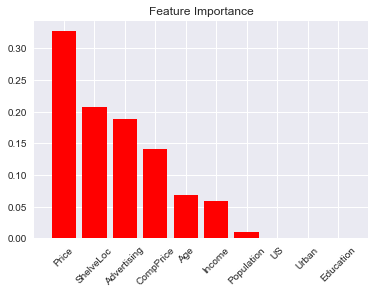

In [10]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(tree_carseats, 
                         feature_names=X.columns,
                         x_tick_rotation=45);#기울이는 각도

graphviz 할라 했는데 msi 다운받고 경로설정 다 해줘도 에러떠서 포기했슴...ㅠㅠ

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [12]:
tree_carseats_tt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats_tt.fit(X_train, y_train)
y_pred = tree_carseats_tt.predict(X_test)

tree_carseats_tt.score(X_train, y_train), tree_carseats_tt.score(X_test, y_test)

(0.9, 0.73)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.71      0.75       117
         Yes       0.65      0.76      0.70        83

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



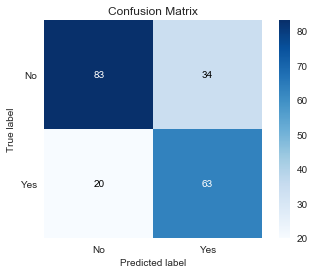

In [14]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# pd.DataFrame(confusion_matrix(y_test, y_pred), index=['No', 'Yes'], columns=['No', 'Yes'])

from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test, y_pred);

# 8.3.2 Fitting Regression Trees

In [15]:
boston = pd.read_csv('datasets/Boston.csv', index_col=0)

In [16]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
X = boston.loc[:, 'crim':'lstat']
y = boston.loc[:, 'medv'] #종속변수 설정

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_boston = DecisionTreeRegressor(min_samples_leaf=5, max_depth=2)
tree_boston.fit(X_train, y_train)
y_pred = tree_boston.predict(X_test)

tree_boston.score(X_train, y_train), tree_boston.score(X_test, y_test)

(0.7461422238084278, 0.6349503884695384)

마찬가지 이유로...ㅠㅠ

# 8.3.3 Bagging and Random Forests

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

boston_bag = RandomForestRegressor(max_features=13, random_state=42) # max feaures는 최적의 분할을 위해 고려할 최대 feature 개수
boston_bag.fit(X_train, y_train)

y_pred = boston_bag.predict(X_test)

mean_squared_error(y_test, y_pred)

14.667482976284576

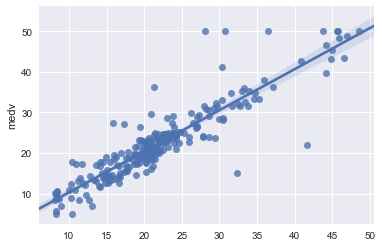

In [20]:
sns.regplot(y_pred, y_test);

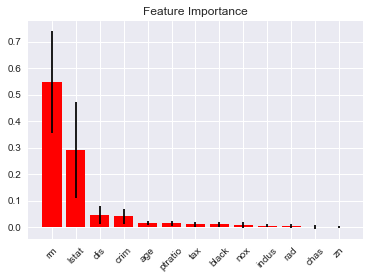

In [21]:
plot_feature_importances(boston_bag, feature_names=X.columns,x_tick_rotation=45);

In [22]:
boston_rf = RandomForestRegressor(max_features=6, random_state=42, n_estimators=100) # 다 다르게 줌
boston_rf.fit(X_train, y_train)

y_pred = boston_rf.predict(X_test)

mean_squared_error(y_test, y_pred)

12.878658150197625

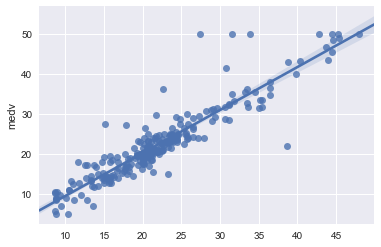

In [23]:
sns.regplot(y_pred, y_test);

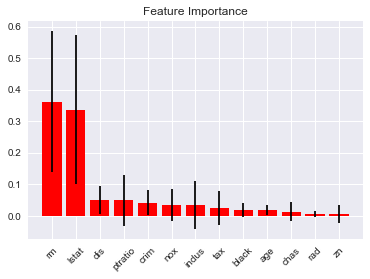

In [24]:
plot_feature_importances(boston_rf, feature_names=X.columns, x_tick_rotation=45);

# 8.3.4 Boosting

tree가 이전 트리를 기반으로 순차적으로 만들어진다. 

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

boston_gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42)
boston_gb.fit(X_train, y_train)

y_pred = boston_gb.predict(X_test)

mean_squared_error(y_test, y_pred)

16.770864624119454

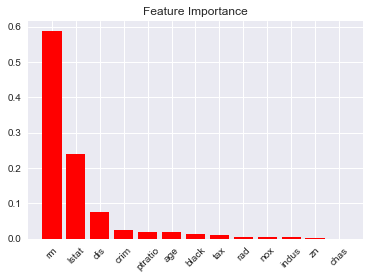

In [26]:
plot_feature_importances(boston_gb, 
                         feature_names=X.columns,
                         x_tick_rotation=45)

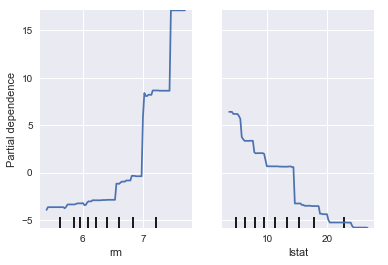

In [31]:
# Partial Dependence Plots
# Partial Dependence Plot의 목적은 하나 혹은 두 개의 변수가 예측 결과에 미치는 주변 효과(marginal effect)를 알아보는 것
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(boston_gb, X_train, [5, 12], feature_names=X.columns);

In [32]:
boston_gb2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=4, random_state=42)
boston_gb2.fit(X_train, y_train)

y_pred = boston_gb2.predict(X_test)

mean_squared_error(y_test, y_pred)

15.275731192364155

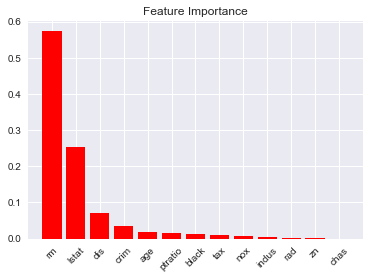

In [33]:
plot_feature_importances(boston_gb2, 
                         feature_names=X.columns,
                         x_tick_rotation=45);